In [1]:
"""We try to test the solutions for an ill-conditioned 4D system"""
import torch
import matplotlib.pyplot as plt
import math
from spectrum_general.spectrum import PSD
from model_classes.hindmarsh_rose import HR
from spectrum_general.matrix_spectrum import matrix_solution
from spectrum_general.sim_spectrum import sim_solution
from spectrum_general.recursive_spectrum import recursive_solution
import numpy as np
import os

os.chdir('..')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
device = torch.device("cpu")

fileloc = r'figures/ill_conditioned/'

In [2]:
"""Define the colors for the different methods"""
color_recursive = '#FFA353'
color_elementwise =  '#095400'
color_matrix =  '#1B3B9D'
color_sim = 'k'

linewidth_recursive = 12
linewidth_elementwise = 3.5
marker_matrix = 8
simulation_marker = 12

font_size = 28

In [32]:
"""Create an ill-conditioned 4D Hurwitz matrix"""
n = 4
J = torch.randn(n , n)
L, V = torch.linalg.eig(J)
L = - torch.abs(torch.real(L)) + 1j*torch.imag(L)
L[-1] = -1e-15
# L[-1] = 0
J = torch.real(V @ torch.diag(L) @ torch.inverse(V))

print(torch.linalg.cond(J))
print(torch.linalg.eigvals(J))

tensor(3.8423e+15)
tensor([-1.4710e-15+0.j, -2.2985e-01+0.j, -2.4734e+00+0.j, -2.9231e+00+0.j])


In [33]:
"""Check how good the inverse is"""
print(torch.linalg.norm(J @ torch.inverse(J) - torch.eye(n)))

tensor(0.2728)


In [34]:
"""Check how good the inverse is after adding iota * omega"""
omega = 1e-10
J1 = J + 1j * omega * torch.eye(n)
print(torch.linalg.norm(J1 @ torch.inverse(J1) - torch.eye(n)))

tensor(1.3841e-06)


In [24]:
"""Make the noise matrices"""
L = 0.001 * torch.eye(n)
S = torch.eye(n)

In [25]:
"""Define the frequency vectors"""
min_freq = 1e-8
max_freq = 10
n_freq_mat = 60
n_freq_rat = 1000

"""Define the frequency vectors for the matrix and rational solutions"""
freq_mat = torch.logspace(np.log10(min_freq), np.log10(max_freq), n_freq_mat)
freq_rat = torch.logspace(np.log10(min_freq), np.log10(max_freq), n_freq_rat)


In [26]:
"""Index of the spectrum"""
idx = 0

"""Analytical solution (matrix)"""
mat_model = matrix_solution(J, L, S)
psd_matrix, _ = mat_model.auto_spectrum(idx, freq_mat)

"""Analytical solution (recursive algorithm)"""
recursive_model = recursive_solution(J, L, S)
psd_recursive, _ = recursive_model.auto_spectrum(idx, freq_rat)

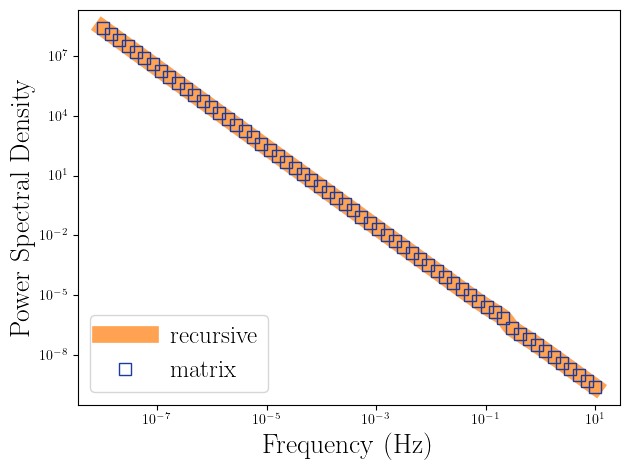

In [27]:
"""Plot the spectrum"""
plt.figure(1)
plt.loglog(freq_rat, psd_recursive, label='recursive', linewidth=linewidth_recursive, color=color_recursive)
plt.loglog(freq_mat, psd_matrix, label='matrix', linewidth=0, marker='s', markerfacecolor='none', markersize=marker_matrix, color=color_matrix)
plt.legend(fontsize=18, loc='lower left')
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Power Spectral Density', fontsize=20)
# plt.xticks([1e-3, 1e-1, 10], ['0.001', '0.1', '10'], fontsize=20)
# plt.yticks([1e-11, 1e-7, 1e-3], fontsize=20)
# plt.xlim([1e-4, 10])
# plt.ylim([1e-11, 1e-3])
plt.tight_layout()
plt.savefig(fileloc + 'psd.svg', format='svg', dpi=1200)
plt.show()